In [2]:
import numpy as np
import pandas as pd
from obspy import read
import matplotlib.pyplot as plt
import os
from obspy.clients.fdsn import Client

In [3]:
def loading_all_files(folder_path,ls):
    files = [f for f in os.listdir(folder_path) if f.endswith('.mseed')]
    for file in files:
        ls.append(folder_path+'/'+file)

In [4]:
ls = []

In [5]:
folder_path = 'E:/Datathon/NASA Space App 2024/Data/Dump/Tanvir_test2/Tanvir/150-850'
loading_all_files(folder_path,ls)

In [6]:
import random

def shuffle_list(string_list):
    random.seed(42)
    random.shuffle(string_list)
    return string_list

ls = shuffle_list(ls)
len(ls)

21

In [7]:
tem = ls

In [8]:
from obspy import read
from obspy.clients.fdsn import Client
from tqdm import tqdm
import numpy as np

client = Client("IRIS",timeout=120)

mseed_files = tem

processed_streams = []
ct = 0

for mseed_file in tqdm(mseed_files):
    st = read(mseed_file)
    
    net = st[0].stats.network
    sta = st[0].stats.station
    # loc = st[0].stats.location  # Uncomment if needed
    chan = st[0].stats.channel
    starttime = st[0].stats.starttime
    endtime = st[0].stats.endtime
    
    inventory = client.get_stations(network=net, station=sta, channel=chan, 
                                    starttime=starttime, endtime=endtime, level="response")
    
    st_tem = st.copy()
    st_tem.remove_response(inventory=inventory, output="VEL")
    data = st_tem[0].data
    time = st_tem[0].times()
    tem = sorted(data)
    mx = tem[-1]
    bl = 1
    for i in range(15):
        if(mx*bl>1):
            break
        bl = bl*10
    # print(data)
    data = data*bl
    # print(bl)
    # print(data)
    ln = len(data)
    st = int(ls[0].split('/')[-2].split('-')[0])
    ed = int(ls[0].split('/')[-2].split('-')[1])
    for i in range(ln):
        if(i+1<ln and time[i]<=st and time[i+1]>st):
            processed_streams.append([data[i],ct])
        else:
            processed_streams.append([data[i],-1])
        ct+=1

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:20<00:00,  1.03it/s]


In [9]:
ls[0]

'E:/Datathon/NASA Space App 2024/Data/Dump/Tanvir_test2/Tanvir/150-850/IU.MAKZ.00.BHZ_2024-01-06T11_52_24.280_2024-01-06T12_09_04.280.mseed'

In [10]:
df = pd.DataFrame(columns = ['data','p_wave'],data = processed_streams)

,data,p_wave
0,0.262477,-1
1,0.267017,-1
2,0.263018,-1
3,0.267501,-1
4,0.263602,-1
...,...,...
699995,-0.027732,-1
699996,-0.027698,-1
699997,-0.027687,-1
699998,-0.027670,-1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   data    700000 non-null  float64
 1   p_wave  700000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 10.7 MB


In [13]:
df['time'] = np.arange(0,len(df),step=1)
df['time'] = df['time']/4.0
df['p_wave'] = df['p_wave']/4.0

In [16]:
x = df.time.values
y = df.data.values
z = df.p_wave.unique()
# z = [z[33],z[34]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   data    700000 non-null  float64
 1   p_wave  700000 non-null  float64
 2   time    700000 non-null  float64
dtypes: float64(3)
memory usage: 16.0 MB


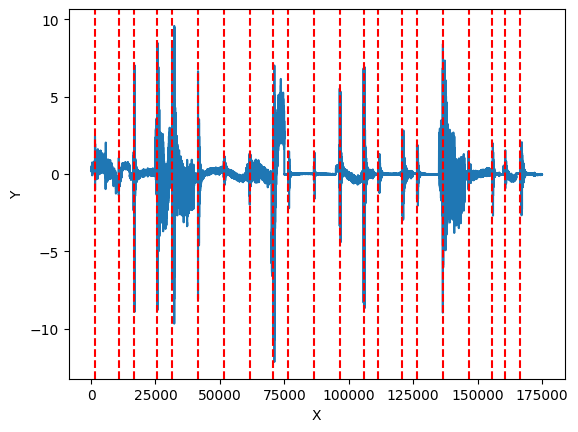

In [18]:
plt.plot(x,y)
for x_value in z[1:]:
    plt.axvline(x=x_value, color='r', linestyle='--', label=f'Line at x={x_value}')

# Optionally add labels, legends, etc.
plt.xlabel('X')
plt.ylabel('Y')

# Show the plot
plt.show()

In [19]:
len(df[:80000].p_wave.unique())-1

3

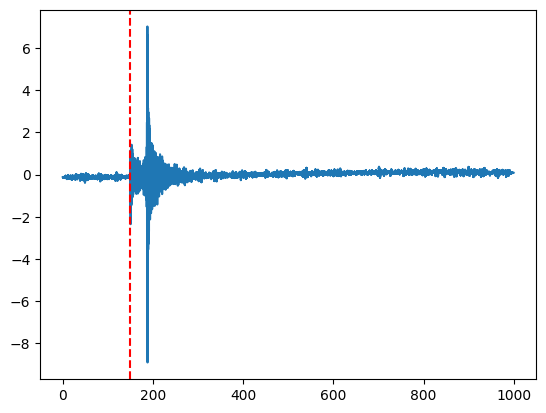

In [20]:
client = Client("IRIS",timeout=120)

st = read(ls[2])
net = st[0].stats.network
sta = st[0].stats.station
# loc = st[0].stats.location  # Uncomment if needed
chan = st[0].stats.channel
starttime = st[0].stats.starttime
endtime = st[0].stats.endtime
    
inventory = client.get_stations(network=net, station=sta, channel=chan, 
                                starttime=starttime, endtime=endtime, level="response")
    
st_tem = st.copy()
st_tem.remove_response(inventory=inventory, output="VEL")
data = st_tem[0].data
time = st_tem[0].times()
tem = sorted(data)
mx = tem[-1]
bl = 1
for i in range(15):
    if(mx*bl>1):
        break
    bl = bl*10
# print(data)
data = data*bl
# print(bl)
# print(data)
ln = len(data)
st1 = int(ls[0].split('/')[-2].split('-')[0])
ed = int(ls[0].split('/')[-2].split('-')[1])
plt.plot(time,data)
plt.axvline(x=st1, color='r', linestyle='--', label=f'Line at x={st}')

In [89]:
import os

file_path = ls[2]

if os.path.exists(file_path):
    os.remove(file_path)  
    print(f"{file_path} has been deleted successfully.")
else:
    print(f"{file_path} does not exist.")

E:/Datathon/NASA Space App 2024/Data/Dump/Tanvir_test2/Tanvir/150-850/II.AAK.00.BHZ_2024-01-05T15_46_58.767_2024-01-05T16_03_38.767.mseed has been deleted successfully.


In [26]:
x = df.values
pr = 0
cr = 0.25
for i in range(ct+1):
    if(ct-1-i>-1):
        if(x[ct-i-1][1]<0):
            pr+=cr
            x[ct-i-1][1] = pr
        else:
            pr = 0
            x[ct-i-1][1] = 0
# for i in range(ct+1):
#     if(ct-1-i>-1):
#         if(x[ct-i-1][1]<0):
#             x[ct-i-1][1] = pr
#         else:
#             pr = x[ct-i-1][1]
df1 = pd.DataFrame(columns=['data','p_wave_arrival','time'],data = x)

In [27]:
df1

,data,p_wave_arrival,time
0,0.262477,1500.00,0.00
1,0.267017,1499.75,0.25
2,0.263018,1499.50,0.50
3,0.267501,1499.25,0.75
4,0.263602,1499.00,1.00
...,...,...,...
699995,-0.027732,1.25,174998.75
699996,-0.027698,1.00,174999.00
699997,-0.027687,0.75,174999.25
699998,-0.027670,0.50,174999.50


In [206]:
df1[:63003]

,data,p_wave_arrival,time
0,0.015914,1500.0,0.00
1,0.015631,1500.0,0.25
2,0.015886,1500.0,0.50
3,0.015607,1500.0,0.75
4,0.015854,1500.0,1.00
...,...,...,...
62998,0.023221,15750.0,15749.50
62999,0.023720,15750.0,15749.75
63000,0.025664,15750.0,15750.00
63001,0.027930,20750.0,15750.25


In [23]:
x = df.time.values
y = df.data.values
z = df.p_wave_arrival.unique()
# z = [z[33],z[34]]
df.info()

AttributeError: 'DataFrame' object has no attribute 'p_wave_arrival'

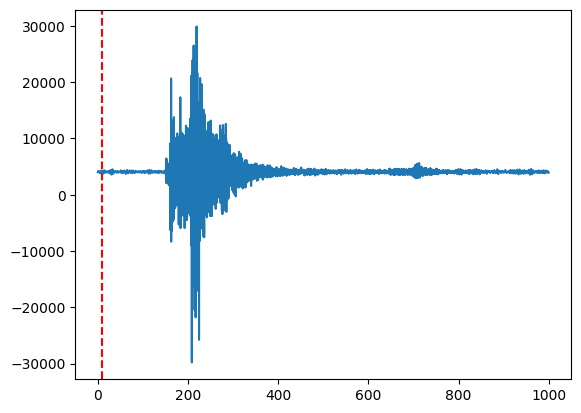

In [67]:
st = read(ls[0])
plt.axvline(x=10, color='r', linestyle='--', label=f'Line at x={x_value}')
plt.plot(st[0].times(),st[0].data)

In [17]:
client = Client("IRIS")
net = st[0].stats.network
sta = st[0].stats.station
# loc = st[0].stats.loctaion
chan = st[0].stats.channel  
starttime = st[0].stats.starttime
endtime = st[0].stats.endtime

inventory = client.get_stations(network=net, station=sta, channel=chan, 
                                starttime=starttime, endtime=endtime, level="response")

st_tem = st.copy()
st_tem = st_tem.remove_response(inventory=inventory, output="VEL")

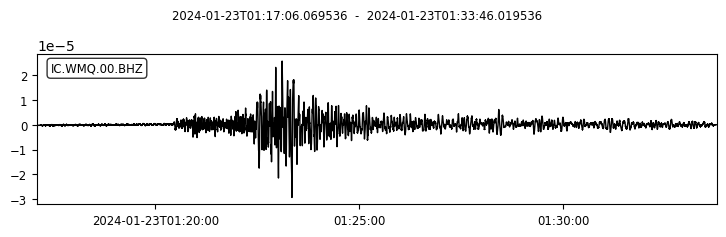

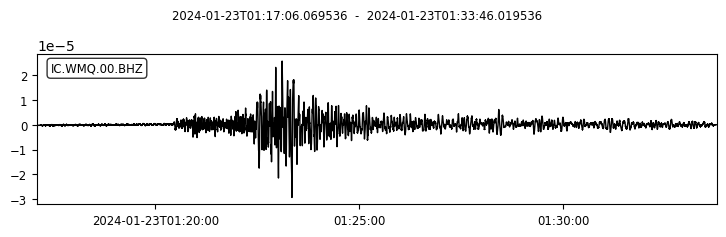

In [18]:
st_tem[0].plot()

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   data            700000 non-null  float64
 1   p_wave_arrival  700000 non-null  float64
 2   time            700000 non-null  float64
dtypes: float64(3)
memory usage: 16.0 MB


In [30]:
df1.to_csv('space_app_demo_dataset_continious.csv',index=False)

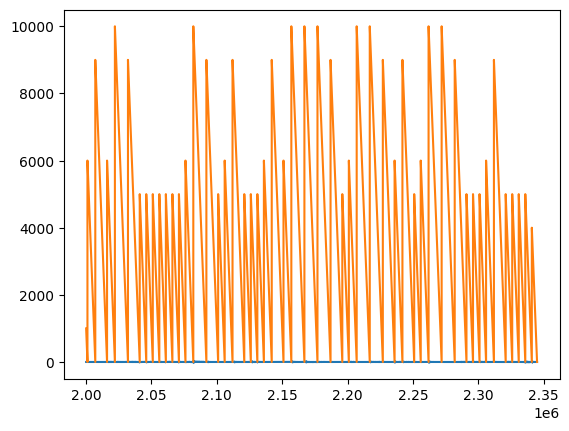

In [134]:
plt.plot(df.time.values[8000000:],df.data.values[8000000:])
plt.plot(df.time.values[8000000:],df.p_wave_arrival.values[8000000:])